In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
# from skimage import data_dir
from skimage.transform import radon, iradon, rescale
image = imread("./Shepp_logan.jpg", as_gray=True)
image = rescale(image, scale=0.4)
plt.figure(figsize=(8, 8.5))
plt.subplot(221)
plt.title("Original")
plt.imshow(image, cmap=plt.cm.Greys_r)
plt.subplot(222)
projections = radon(image, theta=[0, 45, 90])
plt.plot(projections)
plt.title("Projections at\n0, 45 and 90 degrees")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
projections = radon(image)
plt.subplot(223)
plt.title("Radon transform\n(Sinogram)")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
plt.imshow(projections)
reconstruction = iradon(projections)
plt.subplot(224)
plt.title("Reconstruction\nfrom sinogram")
plt.imshow(reconstruction, cmap=plt.cm.Greys_r)
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()

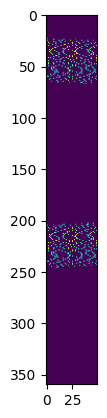

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from helpers.image_exec import ImageExec
import math
from ipywidgets import interact

img = plt.imread("./tomograf-zdjecia/Kropka.jpg")

img_height, img_width, _ = np.shape(img)

image = np.asarray(img)
pxs = img_height

im = ImageExec(image)

sr = int(pxs / 2)
r = int(sr * math.sqrt(2))

sinogram = []

for x in np.arange(0, 360, 1):
    sinogram.append([])
    im.clear_image()
    alpha = math.radians(x)
    fi = math.radians(1)
    n = 50

    E_x = int(r * math.cos(alpha)) + sr
    E_y = int(r * math.sin(alpha)) + sr

    # detectors = list()

    # sinogram.append((alpha, ))

    for i in range(n):
        D_x = int(r * math.cos(alpha + math.pi - fi / 2 + i * (fi / (n - 1)))) + sr
        D_y = int(r * math.sin(alpha + math.pi - fi / 2 + i * (fi / (n - 1)))) + sr
        _, _, val = im.calc_bresenham_line((E_x,E_y),(D_x,D_y))

        # detectors.append(val)
        sinogram[-1].append(val)
    
    # sinogram.append((alpha, detectors))

    # plt.imshow(im.image)


# for row in sinogram:
#   print(math.degrees(row[0]), end = "\t")
#   print(row[1], end = "\n")
# data = [(row[0],y) for y in row[1] for row in sinogram]
# plt.plot([d[0] for d in data], [d[1] for d in data])
# plt.show()

plt.imshow(sinogram, cmap='gray')
plt.show()